In [2]:
from pyfirmata import Arduino, util

In [ ]:
from tensorflow.keras.models import load_model

In [3]:
maskNet = load_model(r"C:\Users\PARTH\car_bike.model")
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import time
import cv2
import os
import smtplib
import ssl
count=0



In [5]:
directory = r"C:\Users\PARTH\Desktop\ADVANCED AUTO DJ STRIKE FINAL\pyfirmata"
os.chdir(directory)




In [6]:
def send_email():
    port = 465  # For SSL
    smtp_server = "smtp.gmail.com"
    sender_email = "advancedauto9899@gmail.com"
    receiver_email = "sidnayak12345@gmail.com"
    password = "advauto@vln98"
    message = """Subject: AdvancedAuto\n Welcome to Advanced Auto. We are glad to help you."""
    
    context = ssl.create_default_context()
    with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
        print("Sending email")
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)
        

In [7]:
board = Arduino('COM5')

In [8]:
iterator=util.Iterator(board)

In [9]:
iterator.start()

In [10]:
vol=board.get_pin('a:0:i')
time.sleep(1.0)
print(vol.read())

0.3245


In [11]:
board.digital[2].write(1)

In [12]:
digital_input = board.get_pin('d:3:i')



In [13]:
print(digital_input.read())

True


In [14]:
vid=cv2.VideoCapture(0)
while True:
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    sw = digital_input.read()
    q=cv2.waitKey(1)

    if sw is False:
        count+=1
        filename='image'+str(count)+'.jpg'
        cv2.imwrite(filename, frame)
        board.digital[4].write(0)
        board.digital[2].write(1)
        send_email()
        time.sleep(0.1)
        break

# After the loop release the cap object
board.digital[4].write(1)
board.digital[2].write(0)
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()
    

Sending email


In [1]:
count


NameError: name 'count' is not defined

<PIL.Image.Image image mode=RGB size=200x200 at 0x23773E32278>


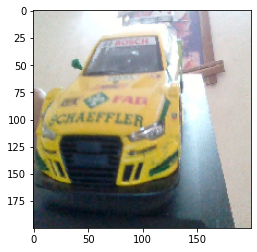

In [16]:

img1 = image.load_img(r'C:\Users\PARTH\Desktop\ADVANCED AUTO DJ STRIKE FINAL\pyfirmata\image' + str(count)+'.jpg', target_size=(200, 200))
print(img1)
plt.imshow(img1)

img = image.img_to_array(img1)
img = img/255
        

In [17]:
img = np.expand_dims(img, axis=0)

In [18]:
prediction = maskNet.predict(img, batch_size=None,steps=1) 

In [19]:
prediction

array([[0.9985821]], dtype=float32)

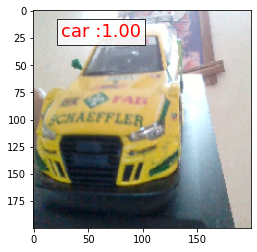

In [20]:
if(prediction[:,:]>0.5):
    value ='car :%1.2f'%(prediction[0,0])
    plt.text(25, 24,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='bike :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()